<a href="https://colab.research.google.com/github/callezenwaka/machine-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Data

In [1]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# define seed & sample size
SEED = 1234
NUM_SAMPLES = 50

In [3]:
# set seed for reproducibility
np.random.seed(SEED)

In [4]:
# generate synthetic data
def generate_data(num_samples):
  """Generate dummy data for linear regression."""
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,20, size=num_samples)
  y = 3.5*X + random_noise # add some noise
  return X, y

In [5]:
# generate random (linear) data
X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print(data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [6]:
# load into a pandas dataframe
df = pd.DataFrame(data, columns=['X', 'y'])
X = df[['X']].values
y = df[['y']].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


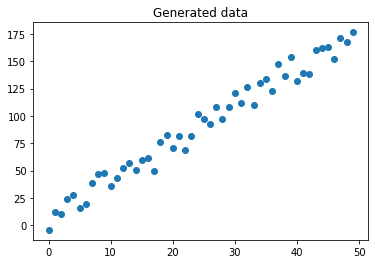

In [7]:
# scatter plot
plt.title("Generated data")
plt.scatter(x=df['X'], y=df['y'])
plt.show()

# Linear Reg. with Numpy

# Split Data

In [8]:
# split percentages
TRAIN_SIZE =0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [9]:
# shuffle data. P.S - never shuffle X & y differently to avoid mismatch
indices = list(range(NUM_SAMPLES))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [10]:
# split indices
train_start = 0
train_end = int(0.7*NUM_SAMPLES)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*NUM_SAMPLES)
test_start = val_end

In [11]:
# split dataset
X_train = X[train_start:train_end]
y_train = y[train_start:train_end]
X_val = X[val_start:val_end]
y_val = y[val_start:val_end]
X_test = X[test_start:]
y_test = y[test_start:]
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (35, 1), y_train: (35, 1)
X_val: (7, 1), y_val: (7, 1)
X_test: (8, 1), y_test: (8, 1)


# Standardize Dataset

In [12]:
# standardize data function
def standardize_data(data, mean, std):
  """Standardize dataset to zero mean & unit variance."""
  return (data - mean)/std

In [13]:
# determine means and stds
X_mean = np.mean(X_train)
X_std = np.std(X_train)
y_mean = np.mean(y_train)
y_std = np.std(y_train)

We need to treat the validation and test sets as if they were hidden datasets. So we only use the train set to determine the mean and std to avoid biasing our training process.

In [14]:
# standardize data
X_train = standardize_data(X_train, X_mean, X_std)
y_train = standardize_data(y_train, y_mean, y_std)
X_val = standardize_data(X_val, X_mean, X_std)
y_val = standardize_data(y_val, y_mean, y_std)
X_test = standardize_data(X_test, X_mean, X_std)
y_test = standardize_data(y_test, y_mean, y_std)

In [15]:
# Check: means should be ~0 and std should be ~1
print(f"mean: {np.mean(X_test, axis=0)[0]:.1f}, std: {np.std(X_test, axis=0)[0]:.1f}")
print(f"mean: {np.mean(y_test, axis=0)[0]:.1f}, std: {np.std(y_test, axis=0)[0]:.1f}")

mean: -0.6, std: 0.9
mean: -0.6, std: 0.9


# Weights

In [21]:
# model dimesions
INPUT_DIM = X_train.shape[1] # X is 1-dimensional
OUTPUT_DIM = y_train.shape[1] # y is 1-dimensional

In [19]:
# initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))
print(f"W: {W.shape}")
print(f"b: {b.shape}")

W: (1, 1)
b: (1, 1)


# Model

In [22]:
# forward pass [Nx1] · [1x1] = [Nx1]
y_pred = np.dot(X_train, W) + b
print(f"y_pred: {y_pred.shape}")

y_pred: (35, 1)


# Loss

In [24]:
# calculate loss using mean squared error (MSE)
N = len(y_train)
loss = (1/N) * np.sum((y_train - y_pred)**2)
print(f"loss: {loss:.2f}")

loss: 0.99


# Gradient

In [25]:
# backpropagation
dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
db = -(2/N) * np.sum((y_train - y_pred) * 1)

# Update Weight

In [26]:
# define learning rate hyperparameter
LEARNING_RATE = 1e-1

In [27]:
# update weights
W += -LEARNING_RATE * dW
b += -LEARNING_RATE * db

# Training

In [28]:
# define number of training epochs
NUM_EPOCHS = 100

In [32]:
# initialize random weights
W = 0.01 * np.random.randn(INPUT_DIM, OUTPUT_DIM)
b = np.zeros((1,1))

# training loop
for epoch_num in range(NUM_EPOCHS):
  # forward pass [Nx1] · [1x1] = [Nx1]
  y_pred = np.dot(X_train, W) + b

  # calculate loss
  loss = (1/len(y_train)) * np.sum((y_train - y_pred)**2)

  # show training update & progress
  if epoch_num%10 == 0:
    print(f"Epoch: {epoch_num}, loss: {loss:.3f}")

  # backpropagation
  dW = -(2/N) * np.sum((y_train - y_pred) * X_train)
  db = -(2/N) * np.sum((y_train - y_pred) * 1)

  # update weight
  W += -LEARNING_RATE * dW
  b += -LEARNING_RATE * db

Epoch: 0, loss: 0.990
Epoch: 10, loss: 0.039
Epoch: 20, loss: 0.028
Epoch: 30, loss: 0.028
Epoch: 40, loss: 0.028
Epoch: 50, loss: 0.028
Epoch: 60, loss: 0.028
Epoch: 70, loss: 0.028
Epoch: 80, loss: 0.028
Epoch: 90, loss: 0.028


# Evaluation

In [33]:
# prediction
pred_train = W*X_train + b
pred_test = W*X_test + b

In [34]:
# train & test MSE
train_mse = np.mean((y_train - y_pred) **2)
test_mse = np.mean((y_test - pred_test) **2)
print(f"train_MSE: {train_mse:.2f}, test_MSE: {test_mse:.2f}")

train_MSE: 0.03, test_MSE: 0.01


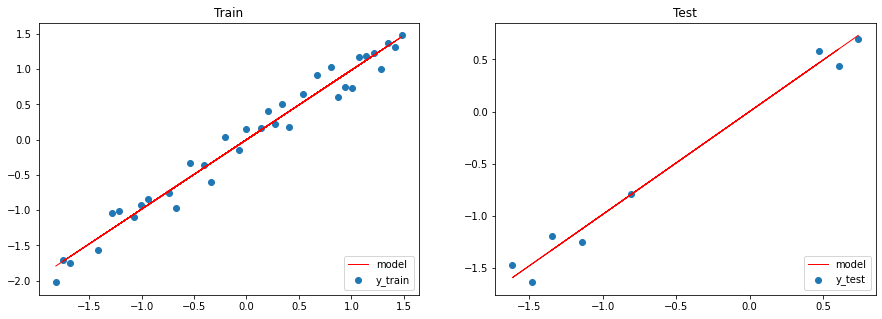

In [41]:
# plot figure size
plt.figure(figsize=(15,5))

# plot train data
plt.subplot(1,2,1)
plt.title("Train")
plt.scatter(X_train, y_train, label='y_train')
plt.plot(X_train, pred_train, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# plot test data
plt.subplot(1,2,2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, pred_test, color='red', linewidth=1, linestyle='-', label='model')
plt.legend(loc='lower right')

# show plots
plt.show()

# Interpretability

In [48]:
# unscaled weights
W_unscaled = W * (y_std/X_std)
b_unscaled = b * y_std + y_mean - np.sum(W_unscaled*X_mean)
print("[actual] y = 3.5X + noise")
print(f"[model] y_hat = {W_unscaled[0][0]:.1f}X + {b_unscaled[0][0]:.1f}")

[actual] y = 3.5X + noise
[model] y_hat = 3.4X + 7.8
